In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import os
# os.chdir("/content/drive/")

In [3]:
# %cd MyDrive/Colab Notebooks/Room Classification

In [4]:
import numpy as np
from tensorflow.keras.models import load_model

In [5]:
model = load_model('model1.h5')

In [6]:
import pickle
with open('X_test.pickle','rb') as f:
  X_test = pickle.load(f)
X_test.shape

(1648, 150, 150, 3)

In [27]:
X_test = X_test/255

In [7]:
with open('y_test.pickle','rb') as f:
  y_test = pickle.load(f)
print(y_test[:5])
y_test.shape

[1. 1. 0. 0. 1.]


(1648,)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 144, 144, 32)      4736      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 68, 68, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0

In [28]:
model.evaluate(X_test, y_test)

52/52 [==============================] - 2s 41ms/step - loss: 0.3835 - accuracy: 0.8756


[0.3834662139415741, 0.8756067752838135]

In [29]:
y_predicted = model.predict(X_test)

In [30]:
y_predicted_labels = [y >= 0.5 for y in y_predicted]

In [31]:
y_predicted_labels[:10]

[array([False]),
 array([ True]),
 array([False]),
 array([False]),
 array([ True]),
 array([ True]),
 array([False]),
 array([False]),
 array([ True]),
 array([ True])]

#Confusion Matrix

In [32]:
from tensorflow.math import confusion_matrix
cm = confusion_matrix(y_test, y_predicted_labels, num_classes=2)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[695, 112],
       [ 93, 748]])>

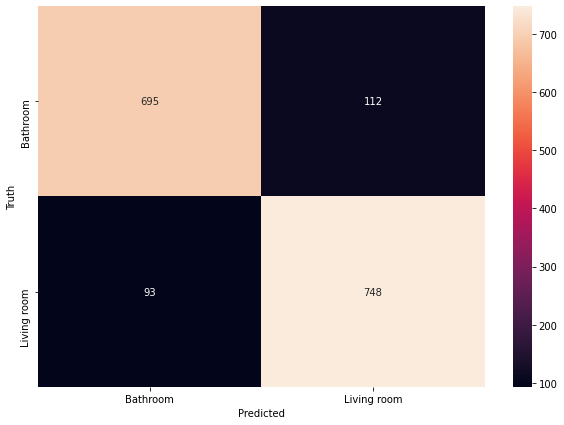

In [33]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.xticks(ticks=[0.5,1.5], labels=['Bathroom','Living room'])
plt.yticks(ticks=[0.5,1.5], labels=['Bathroom','Living room'])
plt.show()

#Test with .JPG picture imported through URL

In [54]:
from urllib.request import urlretrieve
import PIL
import cv2
def classify_from_URL(url):
  urlretrieve(url, "sample.jpg")
  x = cv2.imread("sample.jpg")
  x_test = cv2.resize(x,(150,150,))
  x_test = x_test/255
  label_lst = ["Bathroom", "Living room"]
  y_pred = model.predict(np.array([x_test.tolist()]))
  print(f'Possiblity: {y_pred[0][0]}')
  y_predict_label = label_lst[float(y_pred[0][0]) >= 0.5]
  plt.matshow(x_test)
  plt.xlabel(y_predict_label)

Possiblity: 0.9999998807907104


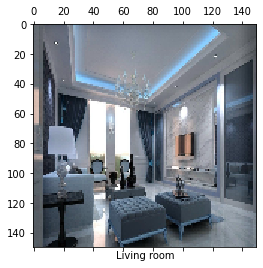

In [55]:
classify_from_URL('https://i.pinimg.com/originals/22/63/3c/22633cd4dc4b98fe248d224475d54b88.jpg')

Possiblity: 0.9999988079071045


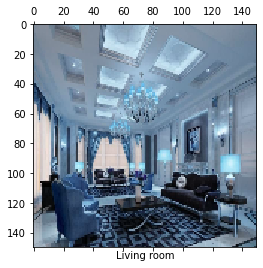

In [56]:
classify_from_URL('https://i.pinimg.com/originals/25/e1/44/25e14431a38ddf44c095934a15ce9397.jpg')

Possiblity: 0.9669058322906494


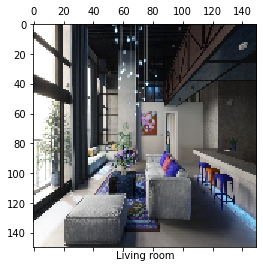

In [57]:
classify_from_URL('https://cdn.home-designing.com/wp-content/uploads/2018/01/flying-pendant-lights-colourful-stools-kitsch-living-room.jpg')

Possiblity: 0.033468928188085556


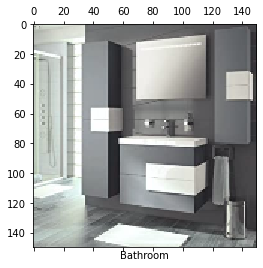

In [58]:
classify_from_URL('https://images-na.ssl-images-amazon.com/images/I/41WoO28JijL._AC_SX355_.jpg')

Possiblity: 0.10807249695062637


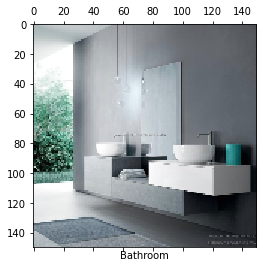

In [59]:
classify_from_URL('https://www.bathroom-china.com/wp-content/uploads/2015/12/AL05-220-650x650.jpg')

Possiblity: 0.10717273503541946


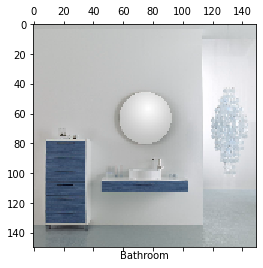

In [60]:
classify_from_URL('https://www.lussostone.com/images/lusso-stone-vogue-large-wall-mounted-designer-bathroom-vanity-unit-1200-p55-343_zoom.jpg')

#Test with picture import from local machine

In [71]:
def classify(picture):
  img = cv2.imread(picture)
  img_resized = cv2.resize(img, (150,150,))
  img_resized = img_resized/255
  label_lst = ["Bathroom", "Living room"]
  y_pred = model.predict(np.array([img_resized.tolist()]))
  print(f'Possiblity: {y_pred[0][0]}')
  y_predict_label = label_lst[float(y_pred[0][0]) >= 0.5]
  plt.figure(figsize=(10,7))
  plt.matshow(img_resized)
  plt.xlabel(y_predict_label)

In [ ]:
# from google.colab import files

In [ ]:
# def upload_picture():
#   uploaded = files.upload()
#   for fn in uploaded.keys():
#     classify(fn)

In [ ]:
# upload_picture()

Possiblity: 0.9917948842048645


<Figure size 720x504 with 0 Axes>

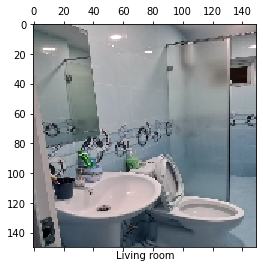

In [72]:
classify('real_image/nhatam_1.jpg')

Possiblity: 0.010190486907958984


<Figure size 720x504 with 0 Axes>

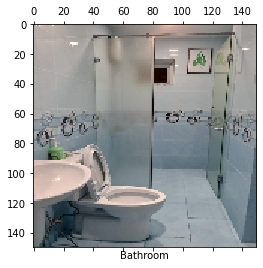

In [74]:
classify('real_image/nhatam_2.jpg')

Possiblity: 0.03647420182824135


<Figure size 720x504 with 0 Axes>

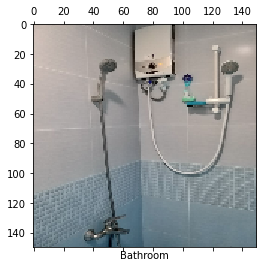

In [75]:
classify('real_image/nhatam_3.jpg')

Possiblity: 0.9986112117767334


<Figure size 720x504 with 0 Axes>

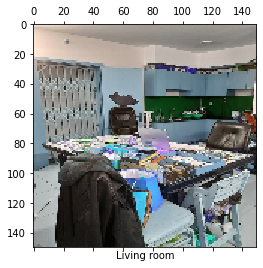

In [76]:
classify('real_image/phongkhach_1.jpg')

Possiblity: 0.9999880790710449


<Figure size 720x504 with 0 Axes>

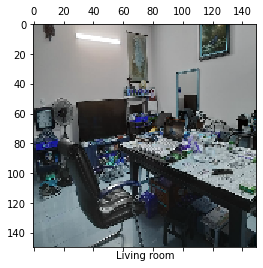

In [77]:
classify('real_image/phongkhach_2.jpg')

Possiblity: 0.9999271631240845


<Figure size 720x504 with 0 Axes>

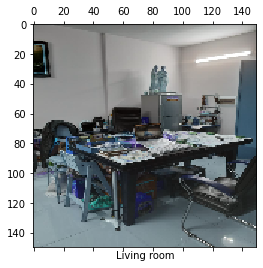

In [78]:
classify('real_image/phongkhach_3.jpg')